In [85]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [86]:
files = glob.glob('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/*.csv')
files

['../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
 '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

In [87]:
df = pd.read_csv(files[0])
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [88]:
df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20'],
      dtype='object')

In [89]:
df['Province/State'] = df['Province/State'].map(lambda x: '' if type(x) == type(np.nan) else x)

In [90]:
df['Country'] = df['Country/Region'] + df['Province/State']

In [91]:
df = df.set_index('Country')

In [406]:
df.loc['China'] = df.where(df['Country/Region'] == "China").sum()

In [407]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,Afghanistan,33.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0,110.0
Albania,,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0,174.0,186.0
Algeria,,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0,409.0
Andorra,,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0
Angola,,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CanadaNorthwest Territories,Northwest Territories,Canada,64.825500,-124.845700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
CanadaYukon,Yukon,Canada,64.282300,-135.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
Kosovo,,Kosovo,42.602636,20.902977,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,86.0


In [394]:
def get_series(country):
    global df
    serie = df.loc[country][4:]
    serie.index = serie.index.map(pd.Timestamp)
    _df = pd.concat([serie, serie.diff()], axis=1)
    _df.columns = ['Total', 'New']
    
    _df = _df.query('Total > 100')
    _df = _df.rolling('7D').mean()

    return _df
    
def plot_data(country, **kwargs):
    _df = get_series(country)
    _df.plot('Total', 'New', **kwargs);

In [395]:
def euclidean(p1, p2):
    return np.sqrt(
        np.square(p2['log_Total'] - p1['log_Total']) + np.square(p1['log_New'] - p1['log_New'])
    )

In [396]:
def compute_infectance(_df):
    infectancia = [0]
    for i in range(1, len(_df)):
        p1, p2 = _df.iloc[i - 1], _df.iloc[i]

        distance = euclidean(p1, p2)
        infectancia.append(distance)

    _df['Infect'] = infectancia
    return _df

In [397]:
infect = {}
for country in df.index.values:
    _df = get_series(country)
    
    _df['log_New'] = _df.New.map(np.log)
    _df['log_Total'] = _df.Total.map(np.log)
    
    infect[country] = compute_infectance(_df)

/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/pandas/core/base.py:1300: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/pandas/core/base.py:1300: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)


In [398]:
breakdown = {}
for country in df.index.values:
    _df = infect[country]
    vec = np.array([_df.log_New.values,_df.log_Total.values])
    try:
        _df['origin_d'] = np.linalg.norm(vec, axis=0)
    except TypeError:
        continue
    mx = _df.origin_d.max()
    if not np.isnan(mx):
        breakdown[country] = _df.query('origin_d == {}'.format(mx))

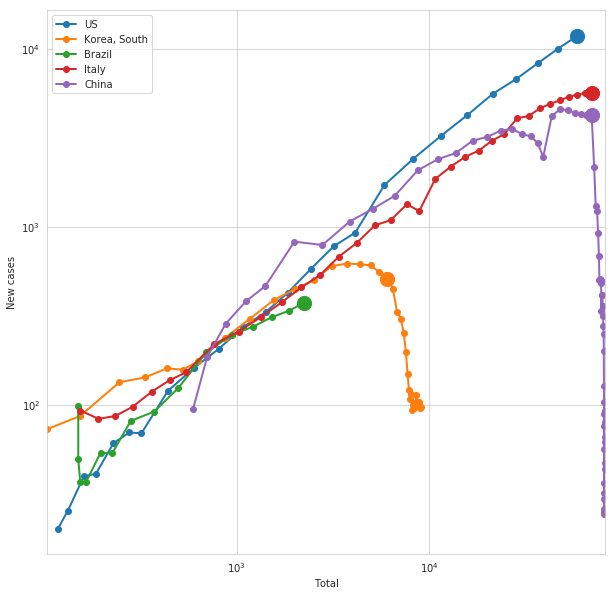

In [403]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
countries = ['US','Korea, South', 'Brazil', 'Italy', 'China']
for c in countries:
    plot_data(c, ax=ax, lw=2, marker='o')
    ax.scatter(breakdown[c].Total.astype(float), breakdown[c].New.values.astype(float), s=200)
    plt.yscale('log')
    plt.xscale('log')

ax.set_ylabel('New cases')
ax.legend(countries);

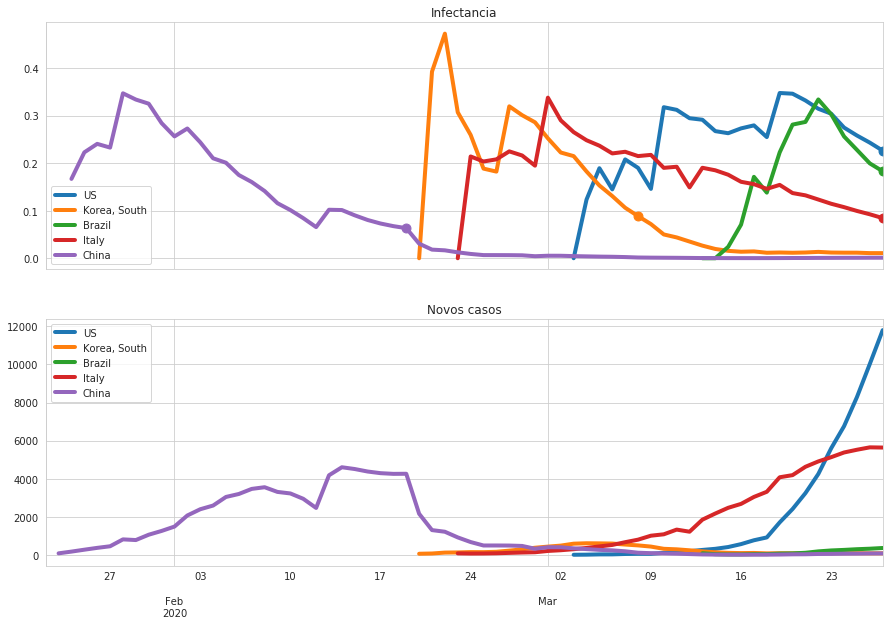

In [401]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
countries = ['US','Korea, South', 'Brazil', 'Italy', 'China']
for c in countries:
    infect[c].Infect.plot(ax=ax[0],lw=4)
    infect[c].New.plot(ax=ax[1], lw=4);
    try:
        val = infect[c].Infect.loc[pd.Timestamp(breakdown[c].index[0])]
        ax[0].scatter(breakdown[c].index[0], val, s=80)
    except KeyError:
        pass
        
    
ax[0].legend(countries)
ax[1].legend(countries)

ax[0].set_title('Infectancia')
ax[1].set_title('Novos casos');


## Parece que esse indice pode ser utilizado para inferir qual seria o momento da saída do comportamento exponencial.

In [409]:
import pickle

pickle.dump(infect, open('../data/processed/infect.pkl', 'wb'))
pickle.dump(breakdown, open('../data/processed/breakdown.pkl', 'wb'))


In [424]:
breakdown['China']

,Total,New,log_New,log_Total,Infect,origin_d
2020-02-19,69491.857143,4265.714286,8.358365,11.148965,0.063349,13.934191


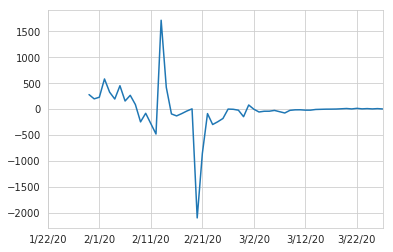

In [423]:
df.loc['China'][4:].rolling(7).mean().diff().diff().plot()